In [ ]:
## Problem Statement
Given the results of previous ad-compaigns need to predict(classify) there would be net gain in running the campaign.

Various classification algorithms have been tried.

RESULTS:
LogisticClassfier model with parameter class_wight='balanced' set had the best resuts on the training data:
('Accuracy:', 0.772052550759256)
('recall:', 0.8449008498583569)
('precision:', 0.5164502164502165)
('f1_score:', 0.6410531972058033    
    
However SVC model (with 'rbf' kernel) had the best resuts on test data:
('Accuracy:', 0.7384405391571405)
('recall:', 0.8881019830028328)
('precision:', 0.4769874476987448)
('f1_score:', 0.6206384558277653)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier,RandomForestRegressor
from xgboost import XGBClassifier                                           
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split   
pd.set_option('display.max_columns',None)

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.linear_model import LinearRegression          
from sklearn import metrics                                 


#ADDED all the required Libraries.


## Data Loading and Cleaning
#doublecheck the current directory
#change directory to 'data'

In [2]:
import os
print(os.getcwd())
os.chdir('./data')
print(os.getcwd())

C:\Users\BLR_01\Pictures\Geyitm\hack3Dec
C:\Users\BLR_01\Pictures\Geyitm\hack3Dec\data


# Read the data.

In [3]:
# Load the dataframe: both initial train and test 
df_train_initial = pd.read_csv('train.csv',delimiter=',')
df_test_initial =pd.read_csv('test.csv',delimiter=',')

#find the shapes of initial data
print('Shape of train_initial: ',df_train_initial.shape)
print('Shape of test_initial: ',df_test_initial.shape)


('Shape of train_initial: ', (19536, 12))
('Shape of test_initial: ', (6512, 11))


# Observe the data

In [4]:
# info on train data initial
df_train_initial.head()

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,UI_9185,Married-civ-spouse,Pharma,Comedy,Male,40,Daytime,United-States,0.027465,Medium,No,0
1,UI_449,Never-married,Political,Comedy,Male,35,Morning,International,0.027465,Low,No,0
2,UI_9014,Never-married,Auto,Comedy,Male,40,Morning,United-States,0.027465,Low,No,0
3,UI_14987,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,Yes,0
4,UI_25532,Married-civ-spouse,Other,Comedy,Female,50,Primetime,United-States,0.027465,Low,Yes,1


In [5]:
# info on test data
df_test_initial.head()

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
0,UI_8772,Never-married,Entertainment,Infomercial,Female,40,Primetime,United-States,0.027465,High,Yes
1,UI_13139,Divorced,Auto,Comedy,Female,40,Primetime,United-States,0.027465,Low,No
2,UI_15381,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,High,No
3,UI_15503,Never-married,Auto,Comedy,Male,30,Primetime,United-States,0.027465,High,Yes
4,UI_16556,Never-married,Political,Comedy,Male,70,Morning,United-States,0.027465,Low,No


In [6]:
# More views of training data in different ways 
df_train_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19536 entries, 0 to 19535
Data columns (total 12 columns):
UserID                               19536 non-null object
realtionship_status                  19536 non-null object
industry                             19536 non-null object
genre                                19536 non-null object
targeted_sex                         19536 non-null object
average_runtime(minutes_per_week)    19536 non-null int64
airtime                              19536 non-null object
airlocation                          19536 non-null object
ratings                              19536 non-null float64
expensive                            19536 non-null object
money_back_guarantee                 19536 non-null object
netgain                              19536 non-null int64
dtypes: float64(1), int64(2), object(9)
memory usage: 1.8+ MB


In [7]:
df_train_initial.describe()

,average_runtime(minutes_per_week),ratings,netgain
count,19536.000000,19536.000000,19536.000000
mean,40.375665,0.038826,0.238022
std,12.483166,0.075971,0.425884
min,1.000000,0.000000,0.000000
25%,40.000000,0.027465,0.000000
50%,40.000000,0.027465,0.000000
75%,45.000000,0.027465,0.000000
max,99.000000,1.000000,1.000000


In [8]:

df_test_initial.describe()

,average_runtime(minutes_per_week),ratings
count,6512.000000,6512.000000
mean,40.049447,0.038385
std,12.466081,0.075497
min,1.000000,0.000000
25%,40.000000,0.027465
50%,40.000000,0.027465
75%,45.000000,0.027465
max,99.000000,1.000000


# Exploratory Analysis

In [9]:
df_train_initial.isna().sum()

UserID                               0
realtionship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
netgain                              0
dtype: int64

In [10]:
df_test_initial.isna().sum()

UserID                               0
realtionship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
dtype: int64

# Observation - No null values in train and test data

In [11]:
#Lets rename long columns
df_train_initial.rename(columns = {'realtionship_status':'status','targeted_sex':'sex','average_runtime(minutes_per_week)':'runtime','money_back_guarantee':'moneyback'}, inplace = True) 


In [12]:
df_train_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19536 entries, 0 to 19535
Data columns (total 12 columns):
UserID         19536 non-null object
status         19536 non-null object
industry       19536 non-null object
genre          19536 non-null object
sex            19536 non-null object
runtime        19536 non-null int64
airtime        19536 non-null object
airlocation    19536 non-null object
ratings        19536 non-null float64
expensive      19536 non-null object
moneyback      19536 non-null object
netgain        19536 non-null int64
dtypes: float64(1), int64(2), object(9)
memory usage: 1.8+ MB


In [13]:
df_test_initial.rename(columns = {'realtionship_status':'status','targeted_sex':'sex','average_runtime(minutes_per_week)':'runtime','money_back_guarantee':'moneyback'}, inplace = True) 


In [14]:
df_test_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6512 entries, 0 to 6511
Data columns (total 11 columns):
UserID         6512 non-null object
status         6512 non-null object
industry       6512 non-null object
genre          6512 non-null object
sex            6512 non-null object
runtime        6512 non-null int64
airtime        6512 non-null object
airlocation    6512 non-null object
ratings        6512 non-null float64
expensive      6512 non-null object
moneyback      6512 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 559.7+ KB


In [15]:
# Inique values
df_train_initial['status'].value_counts()


Married-civ-spouse       8899
Never-married            6433
Divorced                 2700
Widowed                   616
Separated                 598
Married-spouse-absent     274
Married-AF-spouse          16
Name: status, dtype: int64

In [16]:
df_train_initial['industry'].value_counts()

Pharma           7735
Auto             5058
Political        3039
Entertainment    2064
Other            1031
ClassAction       609
Name: industry, dtype: int64

In [17]:
df_train_initial['genre'].value_counts()


Comedy         16699
Infomercial     1871
Drama            612
Direct           186
Other            168
Name: genre, dtype: int64

In [18]:
df_train_initial['sex'].value_counts()


Male      12869
Female     6667
Name: sex, dtype: int64

In [19]:
df_train_initial['airtime'].value_counts()

Primetime    11755
Morning       6397
Daytime       1384
Name: airtime, dtype: int64

In [20]:
df_train_initial['airlocation'].value_counts().head(5)

United-States    17434
Mexico             394
International      355
Philippines        112
Germany             75
Name: airlocation, dtype: int64

In [21]:
df_train_initial['expensive'].value_counts().head(5)

Low       11756
High       5453
Medium     2327
Name: expensive, dtype: int64

In [22]:
df_train_initial['moneyback'].value_counts().head(5)

Yes    9788
No     9748
Name: moneyback, dtype: int64

In [23]:
df_train_initial['netgain'].value_counts().head(5)

0    14886
1     4650
Name: netgain, dtype: int64

## we see imbalance here...need to consider various techniques like,
- Random Oversampling
- Random Undersampling
- SMOTE 
- But before that we can try to use - class_weight feature in LR 

## One-hot encoding

In [24]:
df_train_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19536 entries, 0 to 19535
Data columns (total 12 columns):
UserID         19536 non-null object
status         19536 non-null object
industry       19536 non-null object
genre          19536 non-null object
sex            19536 non-null object
runtime        19536 non-null int64
airtime        19536 non-null object
airlocation    19536 non-null object
ratings        19536 non-null float64
expensive      19536 non-null object
moneyback      19536 non-null object
netgain        19536 non-null int64
dtypes: float64(1), int64(2), object(9)
memory usage: 1.8+ MB


In [25]:
df_test_initial = df_test_initial.drop(['airlocation'],axis=1)

In [26]:
df_train_initial = df_train_initial.drop(['airlocation'],axis=1)


In [27]:
#encode_columns = ['status','industry','genre','sex','airtime','airlocation','expensive','moneyback']
df_train_initial['train']=1
df_test_initial['train']=0

In [28]:
common = pd.concat([df_train_initial, df_test_initial]) # axis =0 by default - rows added

In [29]:
common = pd.get_dummies(common, columns=['status','industry','genre','sex','airtime','expensive','moneyback'], drop_first=True)

In [30]:
# break them back as train and test data 
df_train_two_onehot=common[common['train']==1]

In [31]:
df_test_two_onehot=common[common['train']==0]

In [32]:
df_train_two_onehot.shape

(19536, 26)

In [33]:
df_test_two_onehot.shape

(6512, 26)

In [34]:
# drop price from test
df_test_two_onehot.drop(['netgain'],axis=1,inplace=True)

In [35]:
df_test_two_onehot.head()

,UserID,ratings,runtime,train,status_Married-AF-spouse,status_Married-civ-spouse,status_Married-spouse-absent,status_Never-married,status_Separated,status_Widowed,industry_ClassAction,industry_Entertainment,industry_Other,industry_Pharma,industry_Political,genre_Direct,genre_Drama,genre_Infomercial,genre_Other,sex_Male,airtime_Morning,airtime_Primetime,expensive_Low,expensive_Medium,moneyback_Yes
0,UI_8772,0.027465,40,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
1,UI_13139,0.027465,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,UI_15381,0.027465,40,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0
3,UI_15503,0.027465,30,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
4,UI_16556,0.027465,70,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0


In [36]:
# drop user id which is not useful
df_train_two_onehot = df_train_two_onehot.drop(['UserID'],axis=1)


In [37]:
df_test_two_onehot = df_test_two_onehot.drop(['UserID'],axis=1)


In [38]:
# scale the features runtime and runtime and rating
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
#X = scale.fit_transform(df_train_initial)         # refer cell 71 from where values are coming 
scale_cols = ['runtime','ratings']
for c in scale_cols:
    df_train_two_onehot[c+'_s'] = scale.fit_transform(np.array(df_train_two_onehot[c]).reshape(-1, 1))
    df_test_two_onehot[c+'_s'] = scale.fit_transform(np.array(df_test_two_onehot[c]).reshape(-1, 1))

In [39]:
df_train_two_onehot.head()


,netgain,ratings,runtime,train,status_Married-AF-spouse,status_Married-civ-spouse,status_Married-spouse-absent,status_Never-married,status_Separated,status_Widowed,industry_ClassAction,industry_Entertainment,industry_Other,industry_Pharma,industry_Political,genre_Direct,genre_Drama,genre_Infomercial,genre_Other,sex_Male,airtime_Morning,airtime_Primetime,expensive_Low,expensive_Medium,moneyback_Yes,runtime_s,ratings_s
0,0.0,0.027465,40,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,-0.030095,-0.149548
1,0.0,0.027465,35,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,-0.430644,-0.149548
2,0.0,0.027465,40,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,-0.030095,-0.149548
3,0.0,0.027465,40,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,1,-0.030095,-0.149548
4,1.0,0.027465,50,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0.771005,-0.149548


In [40]:
df_test_two_onehot.head()


,ratings,runtime,train,status_Married-AF-spouse,status_Married-civ-spouse,status_Married-spouse-absent,status_Never-married,status_Separated,status_Widowed,industry_ClassAction,industry_Entertainment,industry_Other,industry_Pharma,industry_Political,genre_Direct,genre_Drama,genre_Infomercial,genre_Other,sex_Male,airtime_Morning,airtime_Primetime,expensive_Low,expensive_Medium,moneyback_Yes,runtime_s,ratings_s
0,0.027465,40,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,-0.003967,-0.144656
1,0.027465,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,-0.003967,-0.144656
2,0.027465,40,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,-0.003967,-0.144656
3,0.027465,30,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,-0.806205,-0.144656
4,0.027465,70,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,2.402748,-0.144656


In [41]:
# drop the original features runtime ratings from both train and test 

In [42]:
df_train_two_onehot.drop(scale_cols,axis=1,inplace=True)
df_test_two_onehot.drop(scale_cols,axis=1,inplace=True)


In [43]:
# Extract X,Y again from new train dataset
X= df_train_two_onehot.drop("netgain",axis=1)
Y=df_train_two_onehot['netgain']

In [44]:
# Done with one hot encoding

In [45]:
X.head()

,train,status_Married-AF-spouse,status_Married-civ-spouse,status_Married-spouse-absent,status_Never-married,status_Separated,status_Widowed,industry_ClassAction,industry_Entertainment,industry_Other,industry_Pharma,industry_Political,genre_Direct,genre_Drama,genre_Infomercial,genre_Other,sex_Male,airtime_Morning,airtime_Primetime,expensive_Low,expensive_Medium,moneyback_Yes,runtime_s,ratings_s
0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,-0.030095,-0.149548
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,-0.430644,-0.149548
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,-0.030095,-0.149548
3,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,1,-0.030095,-0.149548
4,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0.771005,-0.149548


In [46]:
#Drop the original features

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0) #same variable X,Y 

# Option 1 -  Fit a vanilla Logistic Regression model on the training set and predict on the test set and plot the confusion matrix, accuracy, precision, recall and F1_score for the predicted mode

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix,classification_report
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

In [49]:
clf = LogisticRegression().fit(X_train, Y_train)

Y_test_pred = clf.predict(X_test)

print("Accuracy = " , accuracy_score(Y_test, Y_test_pred))
print("Precision = " ,precision_score(Y_test, Y_test_pred))
print("Recall = " ,recall_score(Y_test, Y_test_pred))
print("F1 Score = " ,f1_score(Y_test, Y_test_pred))

pd.crosstab(Y_test_pred, Y_test, rownames=['Predicted'], colnames=['Actual'])

('Accuracy = ', 0.8065176591025423)
('Precision = ', 0.7080838323353293)
('Recall = ', 0.334985835694051)
('F1 Score = ', 0.45480769230769236)


Actual,0.0,1.0
Predicted,,
0.0,4254,939
1.0,195,473


In [50]:
#The recall is low and this is because from the matrix above, we can see that the False Negatives are too many in the data
# this is becuase of higly imbalanced data
# lets use 'weighted_class'

In [51]:
clf = LogisticRegression(class_weight='balanced').fit(X_train, Y_train)

Y_test_pred_balanced = clf.predict(X_test)

print("Accuracy = " , accuracy_score(Y_test, Y_test_pred_balanced))
print("Precision = " ,precision_score(Y_test, Y_test_pred_balanced))
print("Recall = " ,recall_score(Y_test, Y_test_pred_balanced))
print("F1 Score = " ,f1_score(Y_test, Y_test_pred_balanced))

pd.crosstab(Y_test_pred_balanced, Y_test, rownames=['Predicted'], colnames=['Actual'])


('Accuracy = ', 0.7652277768298925)
('Precision = ', 0.5076077768385461)
('Recall = ', 0.8505665722379604)
('F1 Score = ', 0.6357861302276338)


Actual,0.0,1.0
Predicted,,
0.0,3284,211
1.0,1165,1201


# We see ther is large jump in the F1 score - from 0.45 to 0.63
# We will continue to use other methods as well to remove imbalance - mainly oversampling techniques


In [52]:
from imblearn.over_sampling import RandomOverSampler

('Accuracy = ', 0.7660808735710629)
('Precision = ', 0.5086974968179889)
('Recall = ', 0.8491501416430595)
('F1 Score = ', 0.6362430352878746)


Actual,0.0,1.0
Predicted,,
0.0,3291,213
1.0,1158,1199


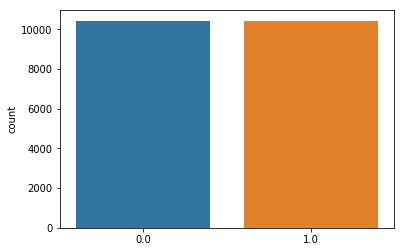

In [53]:
#Perform Random Oversampling on the train data 
ros = RandomOverSampler(random_state=0)

#Sample the train data using random over sampling method
X_sample_2, y_sample_2 = ros.fit_sample(X_train, Y_train)

# Using a countplot 
sns.countplot(y_sample_2)

#Initialising a logsitic regression model
model_ros = LogisticRegression()

#Fitting the model with train data
model_ros.fit(X_sample_2, y_sample_2)

#Making predictions of the train data
Y_pred=model_ros.predict(X_test)

# Calculating the necessary metrics
print("Accuracy = " , accuracy_score(Y_test, Y_pred))
print("Precision = " ,precision_score(Y_test, Y_pred))
print("Recall = " ,recall_score(Y_test, Y_pred))
print("F1 Score = " ,f1_score(Y_test, Y_pred))

#Finding the confusion matrix 
pd.crosstab(Y_pred, Y_test, rownames=['Predicted'], colnames=['Actual'])

In [54]:
# We see marginal increase
# lets try out SMOTE

In [55]:
from imblearn.over_sampling import SMOTE

D:\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


('Accuracy:', 0.7669339703122334)
('recall:', 0.8441926345609065)
('precision:', 0.5098374679213002)
('f1_score:', 0.6357333333333334)


Actual,0.0,1.0
Predicted,,
0.0,3303,220
1.0,1146,1192


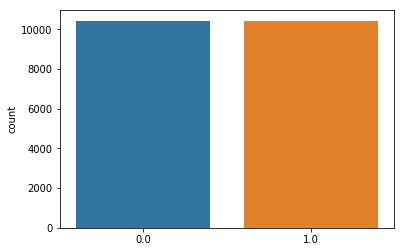

In [56]:
#Initialising a SMOTE object
smote = SMOTE(random_state=12,ratio=1.0)

#Sampling the data using SMOTE
X_sample_3, y_sample_3 = smote.fit_sample(X_train, Y_train)

# Using a countplot plot the distribution of y_sample_3
sns.countplot(y_sample_3)

#Initialising Logistic Regression model
###model_smote = LogisticRegression()

####################NEW
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)


############################
#Fitting the model on train data
##################model_smote.fit(X_sample_3, y_sample_3)
logreg_cv.fit(X_sample_3, y_sample_3)
#Making predictions on test data
#############Y_pred=model_smote.predict(X_test)
Y_pred=logreg_cv.predict(X_test)
#Finding the accuracy score 

###accuracy_smote=model_smote.score(X_test,Y_test)
###print("Accuracy:",accuracy_smote)       

accuracy_smote=logreg_cv.score(X_test,Y_test)
print("Accuracy:",accuracy_smote)       


#Finding the recall score
recall_smote=recall_score(Y_test, Y_pred)
print ("recall:",recall_smote)



#Finding the precision score
precision_smote=precision_score(Y_test, Y_pred)
print ("precision:",precision_smote)

#Finding the f1 score
f1_smote=f1_score(Y_test, Y_pred)
print ("f1_score:", f1_smote)

#Finding the confusion matrix
pd.crosstab(Y_pred,Y_test, rownames=['Predicted'], colnames=['Actual'])

In [57]:
# TRY other models as well
# Try fitting KNN with different neighbors

In [58]:
# creata first submission file - submission1

In [59]:
#Y_predict_sub=model_smote.predict(df_test_two_onehot)

Y_predict_sub=logreg_cv.predict(df_test_two_onehot)

In [60]:
submission = pd.DataFrame(Y_predict_sub,columns=['netgain'])
#submission = pd.concat([Id,prediction['y']],1)

#submission.to_csv('../data/submission.csv',index=False)
submission.to_csv('../data/submissionGLR.csv',index=False)

In [61]:
# end submission file

In [62]:
#TRY KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier
scores = []
for i in range(1,690):#optimal value
  knn = KNeighborsClassifier(n_neighbors=i,metric='manhattan',weights='uniform')#, ‘manhattan’, ‘minkowski’#  knn.fit(X_sample_3,y_sample_3)

    #  y_pred = knn.predict(X_test)
#  scores.append(accuracy_score(Y_pred,Y_test))


#Fitting the model on train data
knn.fit(X_sample_3, y_sample_3)

#Making predictions on test data
Y_pred=knn.predict(X_test)

#Finding the accuracy score 
accuracy_smote=knn.score(X_test,Y_test)
print("Accuracy:",accuracy_smote)       


#Finding the recall score
recall_smote=recall_score(Y_test, Y_pred)
print ("recall:",recall_smote)

#Finding the precision score
precision_smote=precision_score(Y_test, Y_pred)
print ("precision:",precision_smote)

#Finding the f1 score
f1_smote=f1_score(Y_test, Y_pred)
print ("f1_score:", f1_smote)

#Finding the confusion matrix
pd.crosstab(Y_pred,Y_test, rownames=['Predicted'], colnames=['Actual'])
    

('Accuracy:', 0.7643746800887221)
('recall:', 0.7358356940509915)
('precision:', 0.5075720566682951)
('f1_score:', 0.6007516623301532)


Actual,0.0,1.0
Predicted,,
0.0,3441,373
1.0,1008,1039


In [64]:
Y_predict_sub=knn.predict(df_test_two_onehot)

submission = pd.DataFrame(Y_predict_sub,columns=['netgain'])
#submission = pd.concat([Id,prediction['y']],1)

submission.to_csv('../data/submissionknn.csv',index=False)

In [65]:
# lets try class_weight='balanced' with LR and SMOTE -- combine both aspects

In [66]:

LR_smote=LogisticRegression(class_weight='balanced')

#Fitting the model on train data
LR_smote.fit(X_sample_3, y_sample_3)

#Making predictions on test data
Y_pred=LR_smote.predict(X_test)

#Finding the accuracy score 
accuracy_smote=LR_smote.score(X_test,Y_test)
print("Accuracy:",accuracy_smote)       


#Finding the recall score
recall_smote=recall_score(Y_test, Y_pred)
print ("recall:",recall_smote)

#Finding the precision score
precision_smote=precision_score(Y_test, Y_pred)
print ("precision:",precision_smote)

#Finding the f1 score
f1_smote=f1_score(Y_test, Y_pred)
print ("f1_score:", f1_smote)

#Finding the confusion matrix
pd.crosstab(Y_pred,Y_test, rownames=['Predicted'], colnames=['Actual'])


('Accuracy:', 0.7667633509639993)
('recall:', 0.8441926345609065)
('precision:', 0.5096194955109021)
('f1_score:', 0.635563849640096)


Actual,0.0,1.0
Predicted,,
0.0,3302,220
1.0,1147,1192


In [67]:
## RandomForest classifier with SMOTE

In [68]:
# submission2

In [69]:
Y_predict_sub=LR_smote.predict(df_test_two_onehot)

submission = pd.DataFrame(Y_predict_sub,columns=['netgain'])
#submission = pd.concat([Id,prediction['y']],1)

submission.to_csv('../data/submission2.csv',index=False)


In [70]:
from sklearn.ensemble import RandomForestClassifier


In [71]:
rf_c = RandomForestClassifier(n_estimators = 600, random_state = 0)

In [72]:
#Fitting the model on train data
rf_c.fit(X_sample_3, y_sample_3)

#Making predictions on test data
Y_pred=rf_c.predict(X_test)

#Finding the accuracy score 
accuracy_smote=rf_c.score(X_test,Y_test)
print("Accuracy:",accuracy_smote)       


#Finding the recall score
recall_smote=recall_score(Y_test, Y_pred)
print ("recall:",recall_smote)

#Finding the precision score
precision_smote=precision_score(Y_test, Y_pred)
print ("precision:",precision_smote)

#Finding the f1 score
f1_smote=f1_score(Y_test, Y_pred)
print ("f1_score:", f1_smote)

#Finding the confusion matrix
pd.crosstab(Y_pred,Y_test, rownames=['Predicted'], colnames=['Actual'])

('Accuracy:', 0.773758744241597)
('recall:', 0.7620396600566572)
('precision:', 0.5208131655372701)
('f1_score:', 0.6187464059804486)


Actual,0.0,1.0
Predicted,,
0.0,3459,336
1.0,990,1076


In [73]:
# SVC classifier with SMOTE

In [74]:
Y_predict_sub=rf_c.predict(df_test_two_onehot)

submission = pd.DataFrame(Y_predict_sub,columns=['netgain'])
#submission = pd.concat([Id,prediction['y']],1)

submission.to_csv('../data/submission3.csv',index=False)


In [75]:
from sklearn.svm import SVC

In [76]:
# kernels = ['linear', 'poly', 'rbf', 'sigmoid']
#svc_p = SVC(kernel = 'poly',degree=3)
svc_p = SVC(kernel = 'rbf', class_weight='balanced',C=3,tol=0.001) #gamma='auto',class_weight='balanced')
##param_grid = {'C': [0.1, 1, 10, 100, 1000],  
           #   'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
  ##            'kernel': ['rbf'],
   ##            'class_weight':['balanced']}

In [77]:
##grid = GridSearchCV(SVC(), param_grid, refit = True)

In [78]:
#Fitting the model on train data
svc_p.fit(X_sample_3, y_sample_3)

#Making predictions on test data
Y_pred=svc_p.predict(X_test)

#Finding the accuracy score 
accuracy_smote=svc_p.score(X_test,Y_test)
print("Accuracy:",accuracy_smote)       


#Finding the recall score
recall_smote=recall_score(Y_test, Y_pred)
print ("recall:",recall_smote)

#Finding the precision score
precision_smote=precision_score(Y_test, Y_pred)
print ("precision:",precision_smote)

#Finding the f1 score
f1_smote=f1_score(Y_test, Y_pred)
print ("f1_score:", f1_smote)

#Finding the confusion matrix
pd.crosstab(Y_pred,Y_test, rownames=['Predicted'], colnames=['Actual'])

('Accuracy:', 0.7595973383381676)
('recall:', 0.8470254957507082)
('precision:', 0.5006278777731268)
('f1_score:', 0.6293080768218889)


Actual,0.0,1.0
Predicted,,
0.0,3256,216
1.0,1193,1196


In [79]:
Y_predict_sub=svc_p.predict(df_test_two_onehot)

submission = pd.DataFrame(Y_predict_sub,columns=['netgain'])
#submission = pd.concat([Id,prediction['y']],1)

submission.to_csv('../data/submission4-lasttt.csv',index=False)


In [81]:
#models = [('lr',LogisticRegression()),('svm',SVC())
#stacking = StackingClassifier(estimators=models)

In [82]:
## let try XGBOOST
xgbc = XGBClassifier()

In [83]:
# we are fitting with the base data only now with transformed data

In [84]:
#Fitting the model on train data
xgbc.fit(X_train, Y_train)

#Making predictions on test data
Y_pred=xgbc.predict(X_test)

#Finding the accuracy score 
accuracy_smote=xgbc.score(X_test,Y_test)
print("Accuracy:",accuracy_smote)       


#Finding the recall score
recall_smote=recall_score(Y_test, Y_pred)
print ("recall:",recall_smote)

#Finding the precision score
precision_smote=precision_score(Y_test, Y_pred)
print ("precision:",precision_smote)

#Finding the f1 score
f1_smote=f1_score(Y_test, Y_pred)
print ("f1_score:", f1_smote)

#Finding the confusion matrix
pd.crosstab(Y_pred,Y_test, rownames=['Predicted'], colnames=['Actual'])

('Accuracy:', 0.8193141102200989)
('recall:', 0.4256373937677054)
('precision:', 0.7078916372202592)
('f1_score:', 0.5316231755860239)


D:\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Actual,0.0,1.0
Predicted,,
0.0,4201,811
1.0,248,601


In [87]:
# AND TRY
from sklearn.ensemble import BaggingClassifier
from imblearn.ensemble import BalancedBaggingClassifier


In [88]:
## let try XGBOOST
bag = BaggingClassifier()

In [89]:
#Fitting the model on train data
bag.fit(X_sample_3, y_sample_3)

#Making predictions on test data
Y_pred=bag.predict(X_test)

#Finding the accuracy score 
accuracy_smote=bag.score(X_test,Y_test)
print("Accuracy:",accuracy_smote)       


#Finding the recall score
recall_smote=recall_score(Y_test, Y_pred)
print ("recall:",recall_smote)

#Finding the precision score
precision_smote=precision_score(Y_test, Y_pred)
print ("precision:",precision_smote)

#Finding the f1 score
f1_smote=f1_score(Y_test, Y_pred)
print ("f1_score:", f1_smote)

#Finding the confusion matrix
pd.crosstab(Y_pred,Y_test, rownames=['Predicted'], colnames=['Actual'])

('Accuracy:', 0.7688107831428084)
('recall:', 0.7492917847025495)
('precision:', 0.5138416707139388)
('f1_score:', 0.6096225871506771)


Actual,0.0,1.0
Predicted,,
0.0,3448,354
1.0,1001,1058


In [90]:
Y_predict_sub=bag.predict(df_test_two_onehot)

submission = pd.DataFrame(Y_predict_sub,columns=['netgain'])
#submission = pd.concat([Id,prediction['y']],1)

submission.to_csv('../data/submission6.csv',index=False)

In [91]:
balbag=BalancedBaggingClassifier()

In [92]:
#Fitting the model on train data
balbag.fit(X_sample_3, y_sample_3)

#Making predictions on test data
Y_pred=balbag.predict(X_test)

#Finding the accuracy score 
accuracy_smote=balbag.score(X_test,Y_test)
print("Accuracy:",accuracy_smote)       


#Finding the recall score
recall_smote=recall_score(Y_test, Y_pred)
print ("recall:",recall_smote)

#Finding the precision score
precision_smote=precision_score(Y_test, Y_pred)
print ("precision:",precision_smote)

#Finding the f1 score
f1_smote=f1_score(Y_test, Y_pred)
print ("f1_score:", f1_smote)

#Finding the confusion matrix
pd.crosstab(Y_pred,Y_test, rownames=['Predicted'], colnames=['Actual'])

('Accuracy:', 0.7708582153216175)
('recall:', 0.7563739376770539)
('precision:', 0.5166908563134979)
('f1_score:', 0.6139695314745617)


Actual,0.0,1.0
Predicted,,
0.0,3450,344
1.0,999,1068


In [93]:
Y_predict_sub=balbag.predict(df_test_two_onehot)

submission = pd.DataFrame(Y_predict_sub,columns=['netgain'])
#submission = pd.concat([Id,prediction['y']],1)

submission.to_csv('../data/submission5.csv',index=False)


In [94]:
# LET enhance bagging with gridsearch

In [95]:
param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}



In [96]:
clf = GridSearchCV(BaggingClassifier(RandomForestClassifier(),
                                     n_estimators = 100, max_features = 0.5),
                   param_grid, scoring = 'f1')


In [97]:
clf.fit(X_sample_3, y_sample_3)

GridSearchCV(cv=None, error_score='raise',
       estimator=BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_spl..._estimators=100, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_samples': [0.05, 0.1, 0.2, 0.5], 'base_estimator__max_depth': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [98]:
#Making predictions on test data
Y_pred=clf.predict(X_test)

#Finding the accuracy score 
accuracy_smote=clf.score(X_test,Y_test)
print("Accuracy:",accuracy_smote)       

#Finding the recall score
recall_smote=recall_score(Y_test, Y_pred)
print ("recall:",recall_smote)

#Finding the precision score
precision_smote=precision_score(Y_test, Y_pred)
print ("precision:",precision_smote)

#Finding the f1 score
f1_smote=f1_score(Y_test, Y_pred)
print ("f1_score:", f1_smote)

#Finding the confusion matrix
pd.crosstab(Y_pred,Y_test, rownames=['Predicted'], colnames=['Actual'])

('Accuracy:', 0.6254507985574446)
('recall:', 0.8597733711048159)
('precision:', 0.491497975708502)
('f1_score:', 0.6254507985574446)


Actual,0.0,1.0
Predicted,,
0.0,3193,198
1.0,1256,1214


In [99]:
Y_predict_sub=clf.predict(df_test_two_onehot)

submission = pd.DataFrame(Y_predict_sub,columns=['netgain'])
#submission = pd.concat([Id,prediction['y']],1)

submission.to_csv('../data/submission7.csv',index=False)

In [100]:
# Gridsearch1 

In [101]:
from sklearn.linear_model import SGDClassifier

In [102]:
sgd= SGDClassifier(loss='modified_huber', shuffle=True, random_state=101,epsilon=0.001)

In [103]:
sgd.fit(X_sample_3, y_sample_3)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.001,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='modified_huber', max_iter=None,
       n_iter=None, n_jobs=1, penalty='l2', power_t=0.5, random_state=101,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [104]:
#Making predictions on test data
Y_pred=sgd.predict(X_test)

#Finding the accuracy score 
accuracy_smote=sgd.score(X_test,Y_test)
print("Accuracy:",accuracy_smote)       

#Finding the recall score
recall_smote=recall_score(Y_test, Y_pred)
print ("recall:",recall_smote)

#Finding the precision score
precision_smote=precision_score(Y_test, Y_pred)
print ("precision:",precision_smote)

#Finding the f1 score
f1_smote=f1_score(Y_test, Y_pred)
print ("f1_score:", f1_smote)

#Finding the confusion matrix
pd.crosstab(Y_pred,Y_test, rownames=['Predicted'], colnames=['Actual'])

('Accuracy:', 0.7810953762156628)
('recall:', 0.19830028328611898)
('precision:', 0.6496519721577726)
('f1_score:', 0.30385241454150835)


Actual,0.0,1.0
Predicted,,
0.0,4298,1132
1.0,151,280


In [105]:
# Let do some GridSearch

In [106]:
param_grid = {
 #'bootstrap': [True, False],
 #'bootstrap_features': [True, False],    
 'n_estimators': [5, 10, 15],
 'max_samples' : [0.6, 0.8, 1.0],
 #'base_estimator__bootstrap': [True, False],    
 'base_estimator__n_estimators': [100, 200, 300],
 'base_estimator__max_features' : [0.6, 0.8, 1.0]
}

In [107]:
grid_search=GridSearchCV(BaggingClassifier(base_estimator=RandomForestClassifier()), param_grid=param_grid, cv=5)


In [ ]:
grid_search.fit(X_sample_3, y_sample_3)

In [ ]:
#Making predictions on test data
Y_pred=grid_search.predict(X_test)

#Finding the accuracy score 
accuracy_smote=grid_search.score(X_test,Y_test)
print("Accuracy:",accuracy_smote)       

#Finding the recall score
recall_smote=recall_score(Y_test, Y_pred)
print ("recall:",recall_smote)

#Finding the precision score
precision_smote=precision_score(Y_test, Y_pred)
print ("precision:",precision_smote)

#Finding the f1 score
f1_smote=f1_score(Y_test, Y_pred)
print ("f1_score:", f1_smote)

#Finding the confusion matrix
pd.crosstab(Y_pred,Y_test, rownames=['Predicted'], colnames=['Actual'])

In [ ]:
Y_predict_sub=grid_search.predict(df_test_two_onehot)

submission = pd.DataFrame(Y_predict_sub,columns=['netgain'])
#submission = pd.concat([Id,prediction['y']],1)

submission.to_csv('../data/submission8.csv',index=False)

RESULTS:
LogisticClassfier model with parameter class_wight='balanced' set had the best resuts on the training data:
('Accuracy:', 0.772052550759256)
('recall:', 0.8449008498583569)
('precision:', 0.5164502164502165)
('f1_score:', 0.6410531972058033    
    
However SVC model (with 'rbf' kernel) had the best resuts on test data:
('Accuracy:', 0.7384405391571405)
('recall:', 0.8881019830028328)
('precision:', 0.4769874476987448)
('f1_score:', 0.6206384558277653)
